## 0. Import libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read dataset

In [57]:
df = pd.read_csv('../dataset/food_orders_new_delhi.csv')
df.head(10)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50
7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0
8,9,C6578,R2877,2024-01-02 18:29:59,2024-01-02 20:23:59,1663,40,Cash on Delivery,5% on App,116,48,0
9,10,C9322,R2161,2024-01-05 00:50:19,2024-01-05 02:10:19,491,40,Digital Wallet,10%,189,10,0


In [58]:
df.shape

(1000, 12)

## 2. Data preprocessing

In [59]:
#Check duplicated
df.duplicated().sum()

0

In [60]:
#Check null value
df.isna().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [61]:
df['Discounts and Offers'].unique()

array(['5% on App', '10%', '15% New User', nan, '50 off Promo'],
      dtype=object)

In [62]:
#Create function
def discount_number(var):
    if var == '5% on App':
        return float('0.05')
    elif var == '10%':
        return float('0.1')
    elif var == '15% New User':
        return float('0.15')
    elif var == '50 off Promo':
        return float('0.5')
    else:
        return float('0')

In [63]:
#Create a new column by applying the function above
df['Discounts Value'] = df['Discounts and Offers'].apply(discount_number)
df.head(5)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discounts Value
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,0.05
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,0.10
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,0.15
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0.50


## 3. Cost and Profit analysis

In [64]:
#Calculate the discount amount
df['Discounts Amount'] = df['Discounts Value']*df['Order Value']
df.head(5)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discounts Value,Discounts Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,0.05,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,0.10,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,0.15,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0.00,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0.50,996.00


#### Three costs covered in one order are Delivery fee, Payment processing fee, and Discounts amount.

In [65]:
#Create three columns total cost, revenue and net profit for each order
df['Total Cost'] = df['Delivery Fee'] + df['Payment Processing Fee'] + df['Discounts Amount']
df['Revenue'] = df['Commission Fee']
df['Net Profit'] = df['Revenue'] - df['Total Cost']

df.head(5)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discounts Value,Discounts Amount,Total Cost,Revenue,Net Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,0.05,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,0.10,98.60,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,0.15,140.55,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0.00,0.00,77.00,146,69.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0.50,996.00,1076.00,130,-946.00


In [66]:
#Calculate Total of Cost, Total of Revenue and Total of Profit
Total_cost = df['Total Cost'].sum()
Total_revenue = df['Revenue'].sum()
Total_profit = df['Net Profit'].sum()

print('The total cost is:', Total_cost)
print('The total revenue is:', Total_revenue)
print('The total profit is:', Total_profit)

The total cost is: 232709.84999999998
The total revenue is: 126990
The total profit is: -105719.85


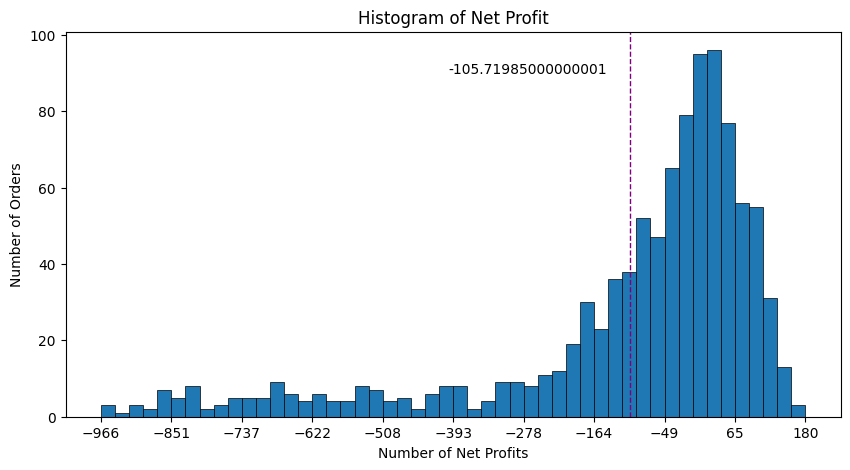

In [67]:
#Create histogram chart of net profit
count, bin_edges = np.histogram(df['Net Profit']) 
df['Net Profit'].plot(kind = 'hist', figsize = (10,5), bins = 50, xticks = bin_edges, edgecolor = 'black', linewidth = 0.5)

line = df['Net Profit'].mean()

plt.title('Histogram of Net Profit')
plt.xlabel('Number of Net Profits')
plt.ylabel('Number of Orders')

plt.axvline(line, color = 'purple', linestyle = '--', linewidth = 1)

plt.text(-400, 90, line)

plt.show()

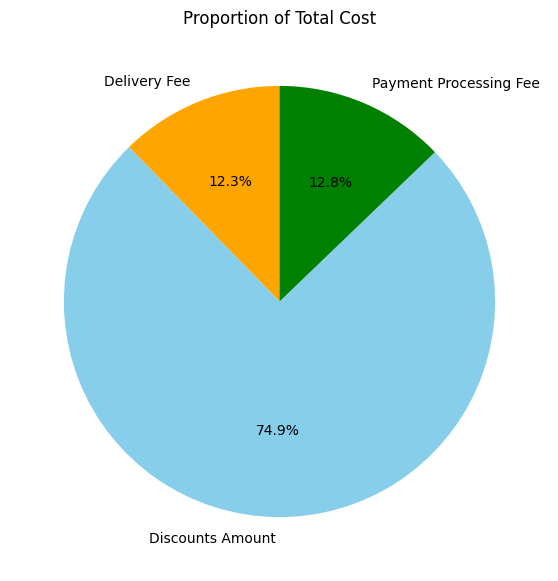

In [68]:
#Create pie chart of cost
df_cost = df[['Delivery Fee', 'Discounts Amount','Payment Processing Fee']].sum()

df_cost.plot(kind = 'pie', figsize=(7, 7), labels=df_cost.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'skyblue', 'green'])

plt.title('Proportion of Total Cost')

plt.show()

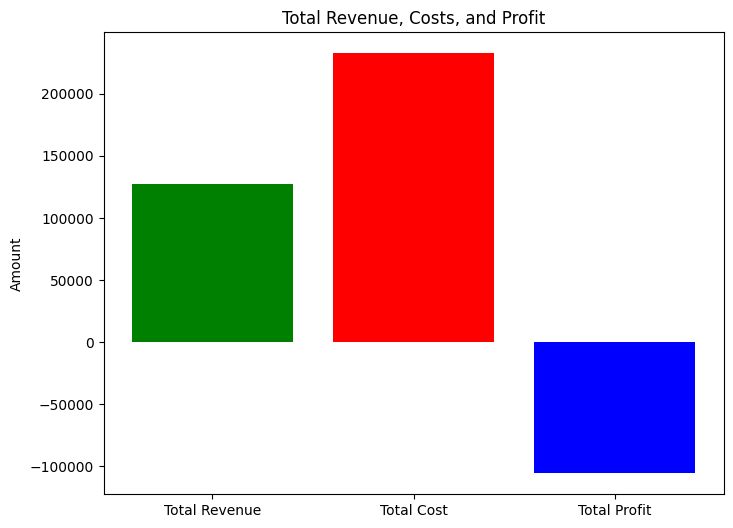

In [83]:
#Create bar chart
totals = ['Total Revenue', 'Total Cost', 'Total Profit']
values = [Total_revenue, Total_cost, Total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])

plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount')

plt.show()

## 4. New profitability strategy proposal

In [74]:
#Select the order that has a profit greater or equal to 0
df_new = df.loc[df['Net Profit'] >= 0]
print('The number of orders that has a profit greater or equal to zero:', df_new.shape[0])

The number of orders that has a profit greater or equal to zero: 416


In [71]:
#Calculate the average commission fee and the average discounts amount
commission_fee = (df_new['Commission Fee']/df_new['Order Value']).mean()
discounts_amount = df_new['Discounts Value'].mean()

print('New percentage of commission fee for profitability is', commission_fee*100)
print('New discounts and offers for profitability is', discounts_amount*100)

New percentage of commission fee for profitability is 30.64188102310904
New discounts and offers for profitability is 5.9735576923076925


#### Based on the analysis above, we recommend the new strategy for profitability:
#####  - Average Commission Fee Percentage ~ 30.64% per order
#####  - Average Discount Amount Percentage ~ 5.97% per order

In [72]:
#Applying the new strategy
df['New commission fee'] = commission_fee*df['Order Value']
df['New discounts amount'] = discounts_amount*df['Order Value']

df['Profit estimation'] = df['New commission fee'] - (df['New discounts amount'] + df['Delivery Fee'] + df['Payment Processing Fee'])
df.head(5)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discounts Value,Discounts Amount,Total Cost,Revenue,Net Profit,New commission fee,New discounts amount,Profit estimation
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,0.05,95.70,142.70,150,7.30,586.485603,114.333894,425.151709
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,0.10,98.60,161.60,198,36.40,302.128947,58.899279,180.229668
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,0.15,140.55,215.55,195,-20.55,287.114425,55.972236,156.142190
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0.00,0.00,77.00,146,69.00,448.290719,87.393149,283.897570
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0.50,996.00,1076.00,130,-946.00,610.386270,118.993269,411.393001


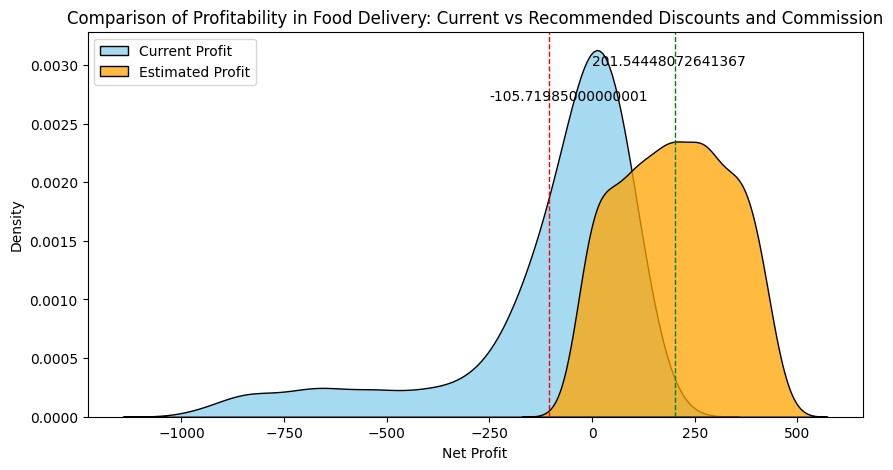

In [84]:
#Create distribution chart to simulate Profitability of Current and Recommended strategies
fig, ax = plt.subplots(figsize = (10, 5))

avg_cur = df['Net Profit'].mean()
avg_est = df['Profit estimation'].mean()

ax = sns.kdeplot(data=df, x='Net Profit', label = 'Current Profit', multiple= 'stack', color ='skyblue')
sns.kdeplot(data=df, x='Profit estimation', ax=ax, label = 'Estimated Profit', multiple= 'stack', color ='orange')

plt.legend(loc = 'upper left')

plt.title('Comparison of Profitability in Food Delivery: Current vs Recommended Discounts and Commission')

plt.axvline(avg_cur, color = 'red', linestyle = '--', linewidth = 1)
plt.axvline(avg_est, color = 'green', linestyle = '--', linewidth = 1)

plt.text(-250, 0.0027, avg_cur)
plt.text(0, 0.003, avg_est)

plt.show()